<a href="https://colab.research.google.com/github/JuanDlog/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [28]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [29]:
!pip install matplotlib

In [30]:
import matplotlib.pyplot as plt

#1. Análisis de facturación



In [31]:
tiendas = ['Tienda-1', 'Tienda-2', 'Tienda-3', 'Tienda-4']
sumaTiendas = []

def sumandoTiendas(tienda):
  precio = tienda['Precio']
  suma = sum(precio)
  sumaTiendas.append(suma)
  return sumaTiendas

sumandoTiendas(tienda)
sumandoTiendas(tienda2)
sumandoTiendas(tienda3)
sumandoTiendas(tienda4)


sumaTiendas


[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

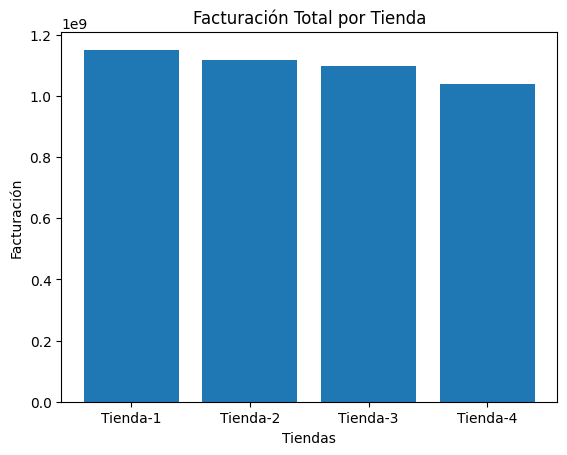

In [32]:
plt.bar(x= tiendas, height= sumaTiendas)
plt.title('Facturación Total por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Facturación')
plt.show()

# 2. Ventas por categoría

In [33]:
listaCategorias = []

def ventasporCategoria(nombre, tienda):
  conteo = tienda.groupby('Categoría del Producto').size()
  listaCategorias.append((str(nombre), conteo.idxmax(), conteo.max()))

  return listaCategorias

ventasporCategoria('tienda1', tienda)
ventasporCategoria('tienda2', tienda2)
ventasporCategoria('tienda3', tienda3)
ventasporCategoria('tienda4', tienda4)

listaCategorias



[('tienda1', 'Muebles', 465),
 ('tienda2', 'Muebles', 442),
 ('tienda3', 'Muebles', 499),
 ('tienda4', 'Muebles', 480)]

In [34]:
dataCategorias = pd.DataFrame(listaCategorias)

In [40]:
dataCategorias = dataCategorias.rename(columns={0: 'Tienda', 1: 'Categoria', 2: 'Cantidad'})
dataCategorias

dataCategorias['Etiqueta'] = dataCategorias['Tienda'] + '-' + dataCategorias['Categoria']
dataCategorias = dataCategorias.sort_values(by='Cantidad', ascending=True)
dataCategorias

,Tienda,Categoria,Cantidad,Etiqueta
1,tienda2,Muebles,442,tienda2-Muebles
0,tienda1,Muebles,465,tienda1-Muebles
3,tienda4,Muebles,480,tienda4-Muebles
2,tienda3,Muebles,499,tienda3-Muebles


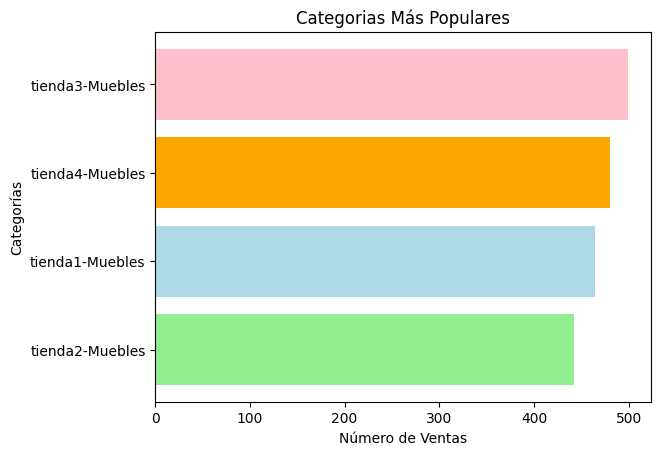

In [41]:
colores = ['lightgreen', 'lightblue', 'orange', 'pink']
plt.barh(dataCategorias['Etiqueta'], dataCategorias['Cantidad'], color=colores)

plt.title('Categorias Más Populares')
plt.xlabel('Número de Ventas')
plt.ylabel('Categorías')
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
calificacionesTiendas = []

def calicacionesPromedios(tienda):
  calificaciones = tienda['Calificación']

  promedio = sum(calificaciones)/len(calificaciones)
  calificacionesTiendas.append(promedio)

  return calificacionesTiendas

calicacionesPromedios(tienda)
calicacionesPromedios(tienda2)
calicacionesPromedios(tienda3)
calicacionesPromedios(tienda4)

calificacionesTiendas

[3.98, 4.04, 4.05, 4.0]

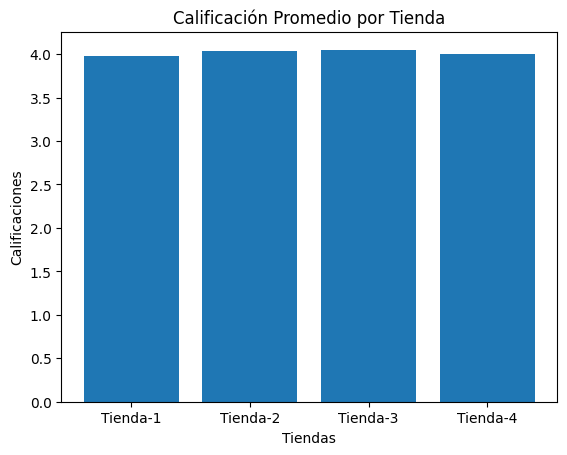

In [ ]:
plt.bar(x= tiendas, height= calificacionesTiendas)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificaciones')
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
listaVentasMax = []
listaVentasMin = []

def numeroVentas(nombre, tienda):
  conteo = tienda.groupby('Producto').size()
  listaVentasMax.append((str(nombre), conteo.idxmax(), conteo.max()))
  listaVentasMin.append((str(nombre), conteo.idxmin(), conteo.min()))
  return listaVentasMax, listaVentasMin

numeroVentas('tienda1', tienda)
numeroVentas('tienda2', tienda2)
numeroVentas('tienda3', tienda3)
numeroVentas('tienda4', tienda4)

print(listaVentasMax)
print(listaVentasMin)




[('tienda1', 'Armario', 60), ('tienda2', 'Iniciando en programación', 65), ('tienda3', 'Kit de bancas', 57), ('tienda4', 'Cama box', 62)]
[('tienda1', 'Auriculares con micrófono', 33), ('tienda2', 'Juego de mesa', 32), ('tienda3', 'Bloques de construcción', 35), ('tienda4', 'Guitarra eléctrica', 33)]


# 5. Envío promedio por tienda

In [ ]:
envioPromedio = []

def enviosTienda(tienda):
  envios = tienda['Costo de envío']

  promedio = sum(envios)/len(envios)
  envioPromedio.append(promedio)

  return envioPromedio

enviosTienda(tienda)
enviosTienda(tienda2)
enviosTienda(tienda3)
enviosTienda(tienda4)

envioPromedio


[26018.60958033065, 25216.235693090293, 24805.680373039424, 23459.457167090754]